> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2017` folder** 

# Assignment 1

**Handin in Peergrade**: *Wednesday, September 27, 2017*<br>
**Peergrading deadline**: *Wednesday, October 4th, 2017*

## Problems

>**Ex. 2.3.4**: You may have noticed that the data['data'] object has a key called 'after'.
1. What do you think this is?
2. Write a function that takes an integer `N` and the name of a subreddit, and returns a JSON with all posts on the first `N` pages of that subreddit. Use it to retrieve a large number of posts.
3. Make an updated version of the figures you produced in Ex. 2.3.2-3 with this larger dataset.
4. Visualize the number of posts over time.

In [1]:
# 1.
# The key 'after' is a paramter that can be passed into the url as apointer to the next page which 

# 2.
import requests as rq
import json

def subreddit(num_pages, name):
    url = "https://www.reddit.com/r/{0}/.json".format(name)
    data = rq.get(url).json()
    
    posts = []
    
    for i in range(num_pages):
        for post in data['data']['children']:            
            posts.append(post)
        after = data['data']['after']
        url = "https://www.reddit.com/r/{0}/.json?after={1}".format(name, after)
        data = rq.get(url).json()
        
    return posts
    
reddit_posts = subreddit(3, "news")
print reddit_posts

[{u'kind': u't3', u'data': {u'domain': u'stlouis.cbslocal.com', u'approved_at_utc': None, u'banned_by': None, u'media_embed': {}, u'subreddit': u'news', u'selftext_html': None, u'selftext': u'', u'link_flair_text': None, u'likes': None, u'suggested_sort': None, u'user_reports': [], u'secure_media': None, u'saved': False, u'id': u'72jel8', u'banned_at_utc': None, u'view_count': None, u'archived': False, u'clicked': False, u'report_reasons': None, u'title': u'St. Louis police union says body cameras could be unfair to officers', u'num_crossposts': 0, u'media': None, u'can_mod_post': False, u'is_crosspostable': False, u'pinned': False, u'score': 1752, u'approved_by': None, u'over_18': False, u'hidden': False, u'num_comments': 285, u'thumbnail': u'', u'subreddit_id': u't5_2qh3l', u'hide_score': False, u'edited': False, u'link_flair_css_class': None, u'author_flair_css_class': None, u'contest_mode': False, u'gilded': 0, u'locked': False, u'downs': 0, u'brand_safe': True, u'secure_media_embe

In [2]:
name = "news"
url = "https://www.reddit.com/r/{0}/.json".format(name)
data = rq.get(url).json()
print data

{u'kind': u'Listing', u'data': {u'modhash': u'', u'children': [{u'kind': u't3', u'data': {u'domain': u'stlouis.cbslocal.com', u'approved_at_utc': None, u'banned_by': None, u'media_embed': {}, u'subreddit': u'news', u'selftext_html': None, u'selftext': u'', u'link_flair_text': None, u'likes': None, u'suggested_sort': None, u'user_reports': [], u'secure_media': None, u'saved': False, u'id': u'72jel8', u'banned_at_utc': None, u'view_count': None, u'archived': False, u'clicked': False, u'report_reasons': None, u'title': u'St. Louis police union says body cameras could be unfair to officers', u'num_crossposts': 0, u'media': None, u'can_mod_post': False, u'is_crosspostable': False, u'pinned': False, u'score': 1764, u'approved_by': None, u'over_18': False, u'hidden': False, u'num_comments': 285, u'thumbnail': u'', u'subreddit_id': u't5_2qh3l', u'hide_score': False, u'edited': False, u'link_flair_css_class': None, u'author_flair_css_class': None, u'contest_mode': False, u'gilded': 0, u'locked'

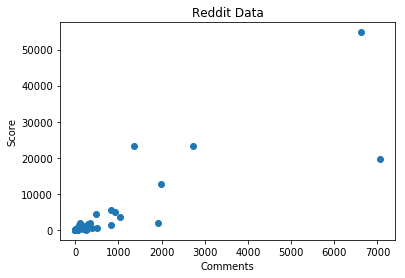

In [12]:
# 3.

from matplotlib import pyplot as plt
import requests as rq

comments = []
scores = []

for post in reddit_posts:
    scores.append(post['data']['score'])
    comments.append(post['data']['num_comments'])
    
plt.scatter(comments, scores)
plt.xlabel("Comments")
plt.ylabel("Score")
plt.title("Reddit Data")
plt.show()

>**Ex. 3.3.2**: Joel gives an example in the book that illustrates the conditional probablity of “both children are girls” knowing “at least one of the children is a girl” versus the probability that "both children are girls" knowing "the older child is a girl". He computes these probabilities with the code below

In [4]:
import random

def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1

print "P(both | older):", both_girls * 1.0 / older_girl      # 0.514 ~ 1/2
print "P(both | either): ", both_girls * 1.0 / either_girl   # 0.342 ~ 1/3

P(both | older): 0.514228456914
P(both | either):  0.341541328364


>Now imagine a family with three children. Assume the only genders are 'boy' and 'girl' and that their probability of occuring are equal and independent. Write a similar piece of code that computes:
1. the probability of three girls?
1. the probability of two girls and one boy?
1. the probability of one girl and two boys?
1. the probability of three boys?
1. the probability that all children are girls given that the oldest child is a girl?
1. the probability that all children are girls given that one of the children is a girl?

In [5]:
allGirls = 0
twoGirls = 0
oneGirl = 0
noGirls = 0
eldestGirl = 0
aGirl = 0

random.seed(0)
for _ in range(10000):
    kids = [random_kid(), random_kid(), random_kid()]
    isGirl = [kid == "girl" for kid in kids]
    numGirls = 0
    for girl in isGirl:
        if girl:
            numGirls += 1
            
    if numGirls == 3:
        allGirls += 1
    if numGirls == 2:
        twoGirls += 1
    if numGirls == 1:
        oneGirl += 1
    if numGirls == 0:
        noGirls += 1
    if numGirls > 0:
        aGirl += 1
    if isGirl[0]:
        eldestGirl += 1
        
pAllGirls = allGirls * 1.0 / 10000
pTwoGirls = twoGirls * 1.0 / 10000
pOneGirl = oneGirl * 1.0 / 10000
pNoGirls = noGirls * 1.0 / 10000
pEldestGirl = eldestGirl * 1.0 / 10000
pAGirl = aGirl * 1.0 / 10000

print "P(threeGirls) = " + str(pAllGirls)
print "P(twoGirls) = " + str(pTwoGirls)
print "P(oneGirl) = " + str(pOneGirl)
print "P(noGirls) = " + str(pNoGirls)
print "P(allGirls | eldestGirl) = " + str(pAllGirls / pEldestGirl)
print "P(allGirls | aGirl) = " + str(pAllGirls / pAGirl)

P(threeGirls) = 0.1249
P(twoGirls) = 0.3782
P(oneGirl) = 0.3771
P(noGirls) = 0.1198
P(allGirls | eldestGirl) = 0.251055276382
P(allGirls | aGirl) = 0.14189956828


>**Ex. 4.1.1**: From the Wikipedia API, get a list of all Marvel superheroes and another list of all Marvel supervillains. Use 'Category:Marvel_Comics_supervillains' and 'Category:Marvel_Comics_superheroes' to get the characters in each category.
1. How many superheroes are there? How many supervillains?
2. How many characters are both heroes and villains? What is the Jaccard similarity between the two groups?

>*Hint: Google something like "get list all pages in category wikimedia api" if you're struggling with the query.*

In [6]:
#Code to find number of superheroes

import requests as rq

superHeroDict = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_superheroes").json()
superHeros = []

while(True):
    for hero in superHeroDict["query"]["categorymembers"]:
            superHeros.append(hero["title"])
            
    if "continue" in superHeroDict.keys():
        cont = superHeroDict["continue"]["cmcontinue"]
        superHeroDict = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_superheroes&cmcontinue=" + cont).json()

    else:
        break
    
print len(superHeros)

965


In [7]:
#Code to determine number of supervillains

superVillainDict = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_supervillains").json()
superVillains = []

while(True):
    for villain in superVillainDict["query"]["categorymembers"]:
            superVillains.append(villain["title"])
            
    if "continue" in superVillainDict.keys():
        cont = superVillainDict["continue"]["cmcontinue"]
        superVillainDict = rq.get("https://en.wikipedia.org/w/api.php?format=json&action=query&list=categorymembers&cmtitle=Category:Marvel_Comics_supervillains&cmcontinue=" + cont).json()

    else:
        break

print len(superVillains)

1301


In [8]:
#Code to find Jaccard Index

#turn each list into a set
heroSet = set(superHeros)
villainSet = set(superVillains)

#find the union and intersection between hero and villain set
heroVillainUnion = heroSet.union(villainSet)
heroVillainIntersection = heroSet.intersection(villainSet)

#jaccard index
jaccard = 1.0 * len(heroVillainIntersection) / len(heroVillainUnion)
print jaccard

0.0816229116945


>**Ex. 4.1.2**: Using this list you now want to download all data you can about each character. However, because this is potentially Big Data, you cannot store it your computer's memory. Therefore, you have to store it in your harddrive somehow. 
* Create three folders on your computer, one for *heroes*, one for *villains*, and one for *ambiguous*.
* For each character, download the markdown on their pages and save in a new file in the corresponding hero/villain/ambiguous folder.

In [146]:
import io

for char in heroVillainUnion:
    url = unicode("https://en.wikipedia.org/w/api.php?format=json&action=query&titles={0}&prop=revisions&rvprop=content").format(char)
    data = rq.get(url).json()
    markup = data['query']['pages'].values()[0]['revisions'][0]['*']
    
    if char in heroVillainIntersection:
        filepath = "./marvel/ambiguous/{0}.txt".format(char)
    elif char in heroSet:
        filepath = "./marvel/heroes/{0}.txt".format(char)
    else:
        filepath = unicode("./marvel/villains/{0}.txt").format(char)
        
    filepath = filepath.strip("/")
    charfile = io.open(filepath, 'w')
    charfile.write(markup)
    charfile.close()


KeyboardInterrupt: 

>**Ex. 4.2.1.1**: Extract the length of the page of each character, and plot the distribution of this variable for each class (heroes/villains/ambiguous). Can you say anything about the popularity of characters in the Marvel universe based on your visualization?

>*Hint: The simplest thing is to make a probability mass function, i.e. a normalized histogram. Use `plt.hist` on a list of page lengths, with the argument `normed=True`. Other distribution plots are fine too, though.*

>**Ex. 4.2.1.2**: Find the 10 characters from each class with the longest Wikipedia pages. Visualize their page lengths with bar charts. Comment on the result.

>**Ex. 4.2.2.1**: We are interested to know if there is a time-trend in the debut of characters.
* Extract into three lists, debut years of heroes, villains, and ambiguous characters.
* Do all pages have a debut year? Do some have multiple? How do you handle these inconsistencies?
* Visualize the amount of heroes introduces over time. You choose how you want to visualize this data, but please comment on your choice. Also comment on the outcome of your analysis.

>*Hint: The debut year is given on the debut row in the info table of a character's Wiki-page. There are many ways that you can extract this variable. You should try to have a go at it yourself, but if you are short on time, you can use this horribly ugly regular expression code:*

>*`re.findall(r"\d{4}\)", re.findall(r"debut.+?\n", markup_text)[0])[0][:-1]`.*

>**Ex. 4.2.3.1**: In this exercise we want to extract the team affiliations for each character. Each character may be associated with multiple teams. In the info table of the markup, the teams are listed in the *alliances*-field.
* Write a regex extracts the *alliances*-field.
* Write a regex that extracts each team from the *alliance*-field.
* Count the number of members for each team (hint: use a `defaultdict`).
* Inspect your team names. Are there any that result from inconsistencies in the information on the pages? How do you deal with this?
* Print the 10 largest alliances and their number of members.

In [165]:
import re
from collections import defaultdict

dd = defaultdict(int)

for char in heroVillainUnion:
    url = unicode("https://en.wikipedia.org/w/api.php?format=json&action=query&titles={0}&prop=revisions&rvprop=content").format(char)
    data = rq.get(url).json()
    markup = data['query']['pages'].values()[0]['revisions'][0]['*']

    try:
        alliances_text = re.findall(r"alliances = .*.", markup)[0]
    except:
        continue
    
    alliances = re.findall("\[\[(.*?)\]\]", alliances_text) 
    print alliances
    print len(alliances)  
    
    for team in alliances:
        dd[team] += 1
        
print dd

[]
0
[u'Avengers (comics)|Avengers', u'Champions (1975 team)|Champions', u'Damage Control (comics)|Damage Control', u'Defenders (comics)|Defenders', u'God Squad (comics)|God Squad', u'Olympians (Marvel Comics)|Olympians']
6
[u'Federal government of the United States|United States Government', u'National Force']
2
[u'Sapien League', u'Purifiers']
2
[u'Dark Riders', u'Inhumans|Inhuman']
2
[]
0
[u'Brotherhood of Mutants', u'Freedom Force (comics)|Freedom Force', u'Hydra (Marvel Comics)|HYDRA']
3
[]
0
[]
0
[u'America Redeemers|Redeemers', u'Squadron Supreme']
2
[]
0
[u'Stark Industries']
1
[]
0
[u'All-Winners Squad', u'Liberty Legion', u'Invaders (comics)|Invaders']
3
[u'Avengers (comics)|Avengers', u'Hank Pym']
2
[u'Rangers (comics)|Rangers', u'West Coast Avengers|Avengers West Coast', u'Avengers (comics)|Avengers']
3
[u'Avengers (comics)|Avengers', u'United States Department of Defense|Department of Defense', u'Force Works', u'The New Avengers (comics)|New Avengers', u'Guardians of the G

[u'Herald of Galactus|Heralds of Galactus']
1
[u'X-Men: The 198|The 198']
1
[]
0
[u'Hydra (comics)|Hydra']
1
[u'Avengers (comics)|Avengers', u'The Last Defenders|Defenders', u'Fantastic Force', u'Fantastic Four', u'She-Hulk#Fearsome Four|Fearsome Four', u'Future Foundation', u'Goodman, Lieber, Kurtzberg & Holliway', u'Heroes for Hire', u'Fifty State Initiative|The Initiative', u'Lady Liberators', u'The Mighty Avengers|Mighty Avengers', u'S.H.I.E.L.D.', u'Hulkbusters', u'A-Force']
14
[u'America Redeemers', u'Squadron Supreme', u'Supreme Power|The Squadron Supreme']
3
[u'Eternals (comics)|Eternals', u'Avengers (comics)|Avengers']
2
[u'X-Men', u'Generation X (comics)|Generation X', u'X-Corps', u'New Warriors']
4
[u'Six Pack (comics)|Six Pack', u'S.H.I.E.L.D.', u'Weapon P.R.I.M.E.']
3
[u'Wakanda (comics)|Wakanda']
1
[u'Morlocks (comics)|Morlocks']
1
[]
0
[]
0
[u'Night Shift (comics)|Night Shift']
1
[u'X-Men: The 198|The 198', u'X-Corporation', u'Hellions (comics)|Hellions']
3
[u'New Men (M

In [179]:
#print sorted(dd.values(), reverse=True)
for item in sorted(dd.values(), reverse=True)[:10]:
    print item


21
13
12
9
8
8
7
6
6
6
